Identificar clientes inadimplentes antes de conceder o empréstimo.

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/KennedyRMenezes/DataScience/refs/heads/master/Estudos/Alura/Classifica%C3%A7%C3%A3o/2.validacao-modelo_e_metrica_avaliacao/emp_automovel.csv')

In [3]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
X = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(X, y)

DecisionTreeClassifier()

In [7]:
print(f'Acuracia: {modelo.score(X,y)}')

Acuracia: 1.0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X, X_teste, y, y_teste = train_test_split(X, y, test_size=0.15, stratify=y, random_state = 5)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [10]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(X_val, y_val)}')

Acurácia de treino: 0.9205574912891986
Acurácia de validação: 0.9059315390645414


In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
y_previsto = modelo.predict(X_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10359   120]
 [  960    42]]


In [13]:
from sklearn.metrics import ConfusionMatrixDisplay as CMD

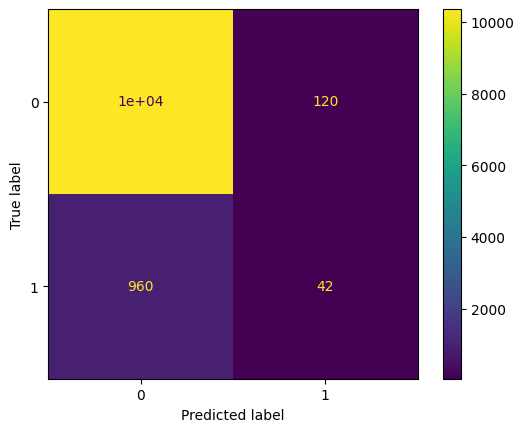

In [14]:
visualizacao = CMD(confusion_matrix=matriz_confusao)
visualizacao.plot();

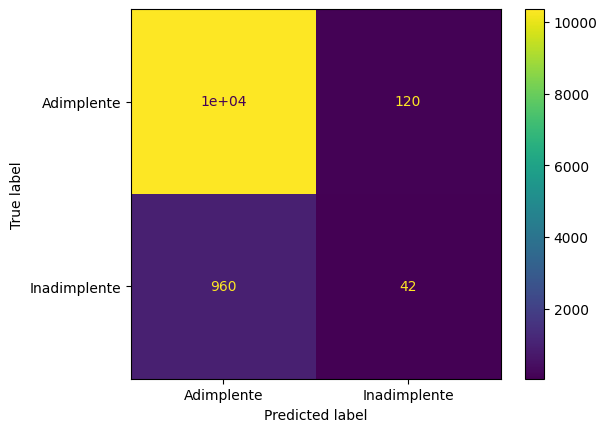

In [15]:
visualizacao = CMD(confusion_matrix=matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

Usando outro algoritmo de classificação

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
modelo = RandomForestClassifier(max_depth=10)
modelo.fit(X_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(X_treino, y_treino)}')
print(f'Acurácia de validacao: {modelo.score(X_val, y_val)}')

Acurácia de treino: 0.9153310104529617
Acurácia de validacao: 0.9128124727811167


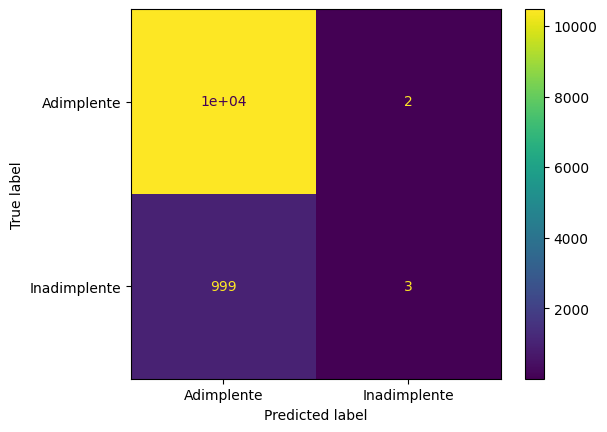

In [18]:
y_previsto = modelo.predict(X_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
viz = CMD(confusion_matrix=matriz_confusao,
                             display_labels = ['Adimplente', 'Inadimplente'])
viz.plot();

Apesar da melhor acurácia o modelo não consegue prever corretamente os clientes inadimplentes.

Acurácia, precisão e recall

Foco é identificar os inadimplentes.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9128124727811167


In [21]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')

Precisão: 0.6


In [22]:
print(f'Recall: {recall_score(y_val, y_previsto)}')


Recall: 0.0029940119760479044


Recall é a métrica mais importante para o negócio já que é melhor identificar os clientes inadimplentes e evitar vendas que não serão convertidas.

In [23]:
print(f'F1-Score: {f1_score(y_val, y_previsto)}')

F1-Score: 0.005958291956305859


Curva ROC

In [24]:
from sklearn.metrics import RocCurveDisplay

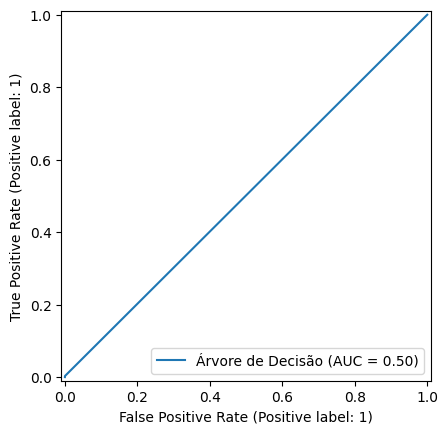

In [25]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão')

Linha diagonal indica previsões aleatórias

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5014015770348795


Curva de precisão x recall

In [28]:
from sklearn.metrics import PrecisionRecallDisplay

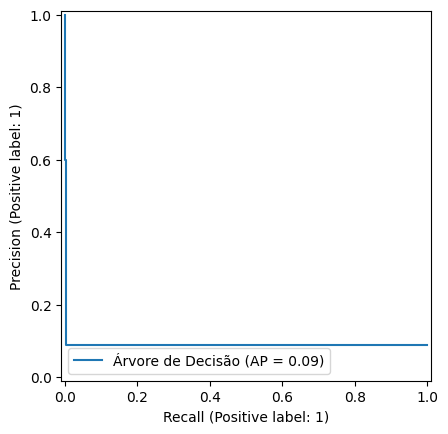

In [29]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto,name='Árvore de Decisão');

AP tanto melhor quanto mais próximo de 1.

Resumo com as principais métricas: Classification Report

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.60      0.00      0.01      1002

    accuracy                           0.91     11481
   macro avg       0.76      0.50      0.48     11481
weighted avg       0.89      0.91      0.87     11481



Usando KFold

In [32]:
from sklearn.model_selection import cross_validate, KFold

In [33]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv = kf)
cv_resultados

{'fit_time': array([0.71055841, 0.44746232, 0.23192596, 0.23569274, 0.21501517]),
 'score_time': array([0.00651002, 0.00456524, 0.0036602 , 0.00479937, 0.00454712]),
 'test_score': array([0.91301034, 0.90820993, 0.90712108, 0.9135453 , 0.89993467])}

In [34]:
cv_resultados['test_score']

array([0.91301034, 0.90820993, 0.90712108, 0.9135453 , 0.89993467])

In [35]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media+2*desvio_padrao, 1)}] (Acurácia)')

Intervalo de confiança: [0.8985232661621884, 0.918205261261899] (Acurácia)


Validação cruzada com recall

In [36]:
def inter_conf(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()
  print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media+2*desvio_padrao, 1)}]')

In [37]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv = kf, scoring='recall')
cv_resultados

{'fit_time': array([0.22590256, 0.22555971, 0.23677063, 0.24107885, 0.24910307]),
 'score_time': array([0.01044679, 0.00685906, 0.00727868, 0.00866532, 0.0082171 ]),
 'test_score': array([0.02642008, 0.01856436, 0.0196802 , 0.01436031, 0.02312139])}

In [38]:
inter_conf(cv_resultados)

Intervalo de confiança: [0.012231289329808192, 0.028627243908997103]


Estratificando os dados

In [39]:
dados['inadimplente'].value_counts(normalize=True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [40]:
from sklearn.model_selection import StratifiedKFold

In [41]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')

In [42]:
inter_conf(cv_resultados)

Intervalo de confiança: [0.016180140819056086, 0.03969328423254713]


Estratégia para melhorar o desempenho do modelo levando em consideração que os dados estão desbalanceados.

Tentar equilibrar a quantidade de dados nas classes target.

Usaremos a técnica de oversampling. (Aumentar a quantidade de dados que tem menor quantidade)

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(X, y)

In [45]:
y_balanceado.value_counts(normalize=True)

,proportion
inadimplente,
0,0.5
1,0.5


In [47]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring='recall')

In [48]:
inter_conf(cv_resultados)

Intervalo de confiança: [0.7191945678714295, 0.7660613099599736]


Resultado alto, mas otimista, já que os dados estão avaliados em dados balanceados. Queremos usar o oversampling apenas para treinar os dados.

Veremos a forma correta de aplicar a técnica de oversampling.

Avaliar em dados balanceados: usaremos um **pipeline de dados**.

In [50]:
from imblearn.pipeline import Pipeline as imbpipeline

In [51]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [53]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [54]:
inter_conf(cv_resultados)

Intervalo de confiança: [0.20819735433847766, 0.2926753079508676]


Técnica de balanceamento de dados com Undersampling reduzindo a quantidade de dados da classe que tem mais quantidade de dados.

In [55]:
from imblearn.under_sampling import NearMiss

In [56]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [57]:
inter_conf(cv_resultados)

Intervalo de confiança: [0.6187659862742724, 0.6992510809204128]


Usar dados de teste para avaliar o modelo com dados não vistos.

Testando o modelo

In [59]:
undersample = NearMiss(version=3)
X_balanceado, y_balanceado = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



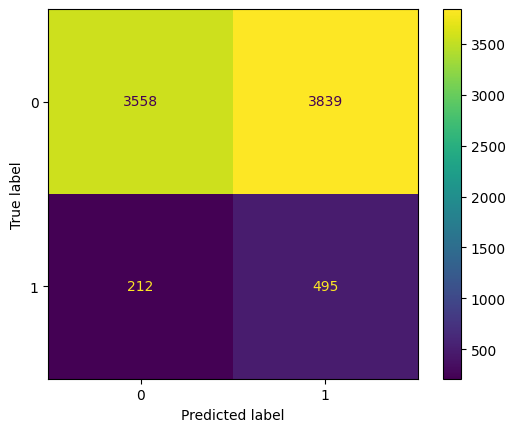

In [61]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_previsto = modelo.predict(X_teste)

print(classification_report(y_teste, y_previsto))
CMD.from_predictions(y_teste, y_previsto)

Agora é possível identificar muito mais clientes inadimplentes.